In [1]:
## Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from warnings import simplefilter

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from matplotlib import pyplot
from pathlib import Path

In [2]:
# N.B. Each year, the column names are ever so slightly different. Thank you BRFSS
# Most importantly, 2019 is _missing_ a column, which we simply fill with nulls

## Import the dataset
root_path = Path.cwd().parent.parent.parent / "data"

df_2021 = pd.read_parquet(
    root_path / "LLCP2021.parquet",
    columns=[
        "CHECKUP1",
        "TOLDHI3",
        "CVDINFR4",
        "CVDSTRK3",
        "CHCKDNY2",
        "DIABETE4",
        "ECIGNOW1",
        "ALCDAY5",
        "_PRACE1",
        "_SEX",
        "_AGE_G",
        "_BMI5CAT",
        "_SMOKER3",
        "MARIJAN1",
        "CNCRTYP1",
        "LCSFIRST",
    ],
)
df_2019 = pd.read_parquet(
    root_path / "LLCP2019.parquet",
    columns=[
        "CHECKUP1",
        "TOLDHI2",
        "CVDINFR4",
        "CVDSTRK3",
        "CHCKDNY2",
        "DIABETE4",
        "ALCDAY5",
        "_PRACE1",
        "_SEX",
        "_AGE_G",
        "_BMI5CAT",
        "_SMOKER3",
        "MARIJAN1",
        "CNCRTYP1",
        "LCSFIRST",
    ],
)
df_2017 = pd.read_parquet(
    root_path / "LLCP2017.parquet",
    columns=[
        "CHECKUP1",
        "TOLDHI2",
        "CVDINFR4",
        "CVDSTRK3",
        "CHCKIDNY",
        "DIABETE3",
        "ECIGNOW",
        "ALCDAY5",
        "_PRACE1",
        "SEX",
        "_AGE_G",
        "_BMI5CAT",
        "_SMOKER3",
        "MARIJANA",
        "CNCRTYP1",
        "LCSFIRST",
    ],
)

df_2019["ECIGNOW"] = pd.NA
df_2019.head(5)

,CHECKUP1,TOLDHI2,CVDINFR4,CVDSTRK3,CHCKDNY2,DIABETE4,ALCDAY5,_PRACE1,_SEX,_AGE_G,_BMI5CAT,_SMOKER3,MARIJAN1,CNCRTYP1,LCSFIRST,ECIGNOW
0,1.0,1.0,2.0,2.0,2.0,3.0,888.0,2.0,2.0,6.0,3.0,3.0,NaN,NaN,NaN,<NA>
1,1.0,2.0,2.0,2.0,2.0,3.0,888.0,1.0,2.0,6.0,2.0,4.0,NaN,NaN,NaN,<NA>
2,1.0,2.0,2.0,2.0,2.0,1.0,888.0,2.0,2.0,6.0,4.0,4.0,NaN,NaN,NaN,<NA>
3,1.0,2.0,2.0,2.0,2.0,3.0,NaN,1.0,2.0,6.0,2.0,9.0,NaN,NaN,NaN,<NA>
4,1.0,1.0,2.0,2.0,2.0,3.0,888.0,1.0,2.0,6.0,2.0,3.0,NaN,NaN,NaN,<NA>


In [3]:
# Reordering the columns to match other datasets
df_2019 = df_2019[
    [
        "CHECKUP1",
        "TOLDHI2",
        "CVDINFR4",
        "CVDSTRK3",
        "CHCKDNY2",
        "DIABETE4",
        "ECIGNOW",
        "ALCDAY5",
        "_PRACE1",
        "_SEX",
        "_AGE_G",
        "_BMI5CAT",
        "_SMOKER3",
        "MARIJAN1",
        "CNCRTYP1",
        "LCSFIRST",
    ]
]

# Standardizing the column names to match
df_2019.columns = [
    "CHECKUP1",
    "TOLDHI3",
    "CVDINFR4",
    "CVDSTRK3",
    "CHCKDNY2",
    "DIABETE4",
    "ECIGNOW1",
    "ALCDAY5",
    "_PRACE1",
    "_SEX",
    "_AGE_G",
    "_BMI5CAT",
    "_SMOKER3",
    "MARIJAN1",
    "CNCRTYP1",
    "LCSFIRST",
]
df_2017.columns = [
    "CHECKUP1",
    "TOLDHI3",
    "CVDINFR4",
    "CVDSTRK3",
    "CHCKDNY2",
    "DIABETE4",
    "ECIGNOW1",
    "ALCDAY5",
    "_PRACE1",
    "_SEX",
    "_AGE_G",
    "_BMI5CAT",
    "_SMOKER3",
    "MARIJAN1",
    "CNCRTYP1",
    "LCSFIRST",
]

## Pulling Positive Examples from Past

Due to the class imbalance between positive and negative stroke cases, we take the positive cases from 2017 and 2019 to minimize the class imbalance. 

Text(0.5, 1.0, 'CVDSTRK3')

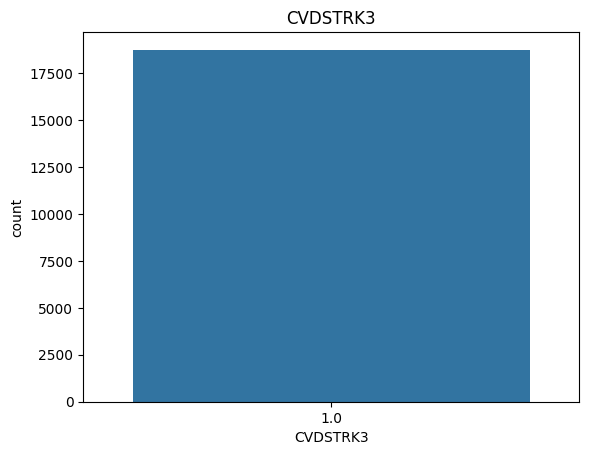

In [4]:
df_edit = df_2019.copy()
df_edit = df_edit[
    (df_edit.CVDSTRK3 != 2.0) & (df_edit.CVDSTRK3 != 9.0) & (df_edit.CVDSTRK3 != 7.0)
]
df_edit.dropna(subset=["CVDSTRK3"], axis=0, inplace=True)
df_2019 = df_edit.copy()
sns.countplot(x="CVDSTRK3", data=df_2019).set_title("CVDSTRK3")

Text(0.5, 1.0, 'CVDSTRK3')

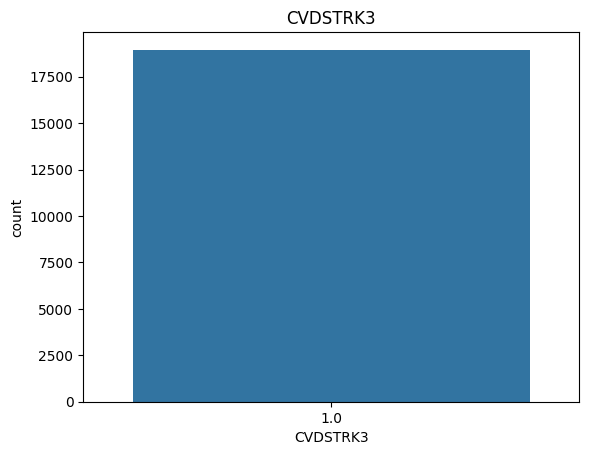

In [5]:
df_edit = df_2017.copy()
df_edit = df_edit[
    (df_edit.CVDSTRK3 != 2.0) & (df_edit.CVDSTRK3 != 9.0) & (df_edit.CVDSTRK3 != 7.0)
]
df_edit.dropna(subset=["CVDSTRK3"], axis=0, inplace=True)
df_2017 = df_edit.copy()
sns.countplot(x="CVDSTRK3", data=df_2017).set_title("CVDSTRK3")

In [6]:
## merge datasets
df = pd.concat([df_2021, df_2019, df_2017], ignore_index=True)
df.to_parquet(root_path / "merged_data.parquet", index=False)

Text(0.5, 1.0, 'CVDSTRK3')

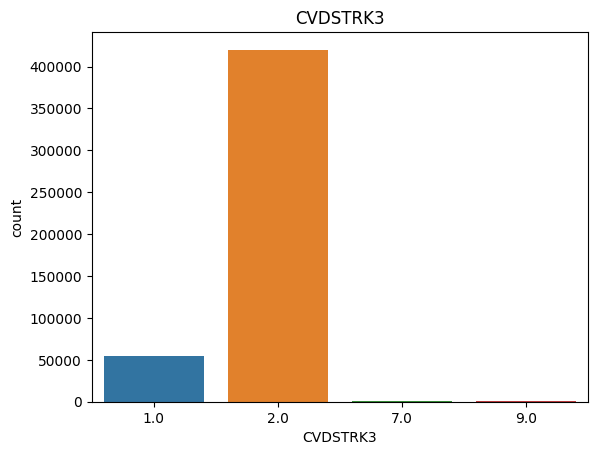

In [7]:
sns.countplot(x="CVDSTRK3", data=df).set_title("CVDSTRK3")